In [ ]:
#!!!!注意，請先執行這個區塊載入 Google 雲端硬碟再執行底下的程式
from google.colab import drive
drive.mount('/content/drive')

# Ch11 自然語言處理實戰演練 (一)：資料預處理、建立詞向量空間

#### 載入相關模組

In [ ]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')

import numpy as np

import string

import gensim
from gensim.models.phrases import Phraser, Phrases
from gensim.models.word2vec import Word2Vec

from sklearn.manifold import TSNE

import pandas as pd
from bokeh.io import output_notebook, output_file
from bokeh.plotting import show, figure
%matplotlib inline

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### 11.1.1 斷句與斷字（tokenization）

In [ ]:
from nltk.corpus import gutenberg

In [ ]:
len(gutenberg.fileids())

18

In [ ]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [ ]:
len(gutenberg.words())

2621613

#####斷句處理

In [ ]:
gberg_sent_tokens = sent_tokenize(gutenberg.raw())

In [ ]:
gberg_sent_tokens[0]

'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.'

In [ ]:
gberg_sent_tokens[1]

"She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."

#####斷字處理

In [ ]:
word_tokenize(gberg_sent_tokens[1])

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [ ]:
word_tokenize(gberg_sent_tokens[1])[14]

'father'

#####用 sents() method 一次做完斷句、斷字

In [ ]:
# a convenient method that handles newlines, as well as tokenizing sentences and words in one shot
gberg_sents = gutenberg.sents()

In [ ]:
gberg_sents[0:3]

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'],
 ['VOLUME', 'I'],
 ['CHAPTER', 'I']]

In [ ]:
gberg_sents[4][14]

'father'

#### 11.1.2 將大寫字母轉成小寫 (以艾瑪第 1 句為例)

##### 原本索引 4 這句的內容

In [ ]:
gberg_sents[4]

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

##### 將索引 4 這句轉成小寫

In [ ]:
[w.lower() for w in gberg_sents[4]]

['she',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

#### 11.1.3 移除停用字與標點符號 (以艾瑪第 1 句為例)

In [ ]:
stpwrds = stopwords.words('english') + list(string.punctuation)

In [ ]:
stpwrds

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
[w.lower() for w in gberg_sents[4] if w.lower() not in stpwrds]

['youngest',
 'two',
 'daughters',
 'affectionate',
 'indulgent',
 'father',
 'consequence',
 'sister',
 'marriage',
 'mistress',
 'house',
 'early',
 'period']

#### 11.1.4 字根提取 (stemming) (以艾瑪第 1 句為例)

In [ ]:
stemmer = PorterStemmer()

In [ ]:
[stemmer.stem(w.lower()) for w in gberg_sents[4] 
 if w.lower() not in stpwrds]

['youngest',
 'two',
 'daughter',
 'affection',
 'indulg',
 'father',
 'consequ',
 'sister',
 'marriag',
 'mistress',
 'hous',
 'earli',
 'period']

#### 11.1.5 找出 n-gram 詞彙並串成單一詞彙

#####將語料庫中的 2-gram 詞彙檢測出來

In [ ]:
phrases = Phrases(gberg_sents) 

In [ ]:
bigram = Phraser(phrases) 

In [ ]:
bigram.phrasegrams 

{(b'two', b'daughters'): (19, 11.966813731181546),
 (b'her', b'sister'): (195, 17.7960829227865),
 (b"'", b's'): (9781, 31.066242737744524),
 (b'very', b'early'): (24, 11.01214147275924),
 (b'Her', b'mother'): (14, 13.529425062715127),
 (b'long', b'ago'): (38, 63.22343628984788),
 (b'more', b'than'): (541, 29.023584433996874),
 (b'had', b'been'): (1256, 22.306024648925288),
 (b'an', b'excellent'): (54, 39.063874851750626),
 (b'Miss', b'Taylor'): (48, 453.75918026073305),
 (b'very', b'fond'): (28, 24.134280468850747),
 (b'passed', b'away'): (25, 12.35053642325912),
 (b'too', b'much'): (173, 31.376002029426687),
 (b'did', b'not'): (935, 11.728416217142811),
 (b'any', b'means'): (27, 14.096964108090186),
 (b'wedding', b'-'): (15, 17.4695197740113),
 (b'Her', b'father'): (18, 13.129571562488772),
 (b'after', b'dinner'): (21, 21.5285481168817),
 (b'self', b'-'): (124, 47.79018053120332),
 (b'sixteen', b'years'): (12, 107.0461671612265),
 (b'five', b'years'): (42, 40.128755673408115),
 (b'ye

##### 測試看看 bigram 物件能否運作

In [ ]:
test_sentence = "Miss Taylor has two daughters".split()

In [ ]:
test_sentence

['Miss', 'Taylor', 'has', 'two', 'daughters']

In [ ]:
bigram[test_sentence]

['Miss_Taylor', 'has', 'two_daughters']

#### 11.1.6 處理整個古騰堡語料庫

#### 去大寫、刪除標點符號

In [ ]:
lower_sents = []
for s in gberg_sents:
    lower_sents.append([w.lower() for w in s if w.lower()
                        not in list(string.punctuation)])

#### 建立 2-gram 詞彙物件

In [ ]:
lower_bigram = Phraser(Phrases(lower_sents))

In [ ]:
lower_bigram.phrasegrams # 全小寫的 2-gram

#####進一步過濾 2-gram 語法

In [ ]:
lower_bigram = Phraser(Phrases(lower_sents, 
                min_count=32, threshold=64))
lower_bigram.phrasegrams

##### 最終處理：將語料庫的所有 2-gram 串成單一詞彙

In [ ]:
clean_sents = []
for s in lower_sents:
    clean_sents.append(lower_bigram[s])

In [ ]:
clean_sents[6]

['sixteen',
 'years',
 'had',
 'miss_taylor',
 'been',
 'in',
 'mr_woodhouse',
 's',
 'family',
 'less',
 'as',
 'a',
 'governess',
 'than',
 'a',
 'friend',
 'very',
 'fond',
 'of',
 'both',
 'daughters',
 'but',
 'particularly',
 'of',
 'emma']

#### 11.2 用 word2vec 建立詞向量空間

#### 11.2.3 使用 word2vec

#### 建立詞向量空間模型物件

In [ ]:
model = Word2Vec(sentences=clean_sents, size=64, 
                  sg=1, window=10, iter=5,
                  min_count=10, workers=4)

In [ ]:
#model.save('/content/drive/MyDrive/Colab Notebooks/F1383_Sample/Ch11/ch11-clean_gutenberg_model.w2v')  #想儲存 w2v 可用

In [ ]:
# 直接取用本書轉換好的檔案, !!!!注意，執行此區塊前，請先執行本頁第一個程式區塊載入 Google 雲端硬碟!!!  
model = gensim.models.Word2Vec.load('/content/drive/MyDrive/Colab Notebooks/F1383_Sample/Ch11/ch11-clean_gutenberg_model.w2v') 

### 查看模型 (詞向量空間) 的內容

In [ ]:
len(model.wv.vocab) # would be 17k if we carried out no preprocessing

10329

In [ ]:
model.wv['dog']

array([ 0.38401067,  0.01232518, -0.37594706, -0.00112308,  0.38663676,
        0.01287549,  0.398965  ,  0.0096426 , -0.10419296, -0.02877572,
        0.3207022 ,  0.27838793,  0.62772304,  0.34408906,  0.23356602,
        0.24557391,  0.3398472 ,  0.07168821, -0.18941355, -0.10122284,
       -0.35172758,  0.4038952 , -0.12179806,  0.096336  ,  0.00641343,
        0.02332107,  0.7743452 ,  0.03591069, -0.20103034, -0.1688079 ,
       -0.01331445, -0.29832968,  0.08522387, -0.02750671,  0.32494134,
       -0.14266558, -0.4192913 , -0.09291836, -0.23813559,  0.38258648,
        0.11036541,  0.005807  , -0.16745028,  0.34308755, -0.20224966,
       -0.77683043,  0.05146591, -0.5883941 , -0.0718769 , -0.18120563,
        0.00358319, -0.29351747,  0.153776  ,  0.48048878,  0.22479494,
        0.5465321 ,  0.29695514,  0.00986911, -0.2450937 , -0.19344331,
        0.3541134 ,  0.3426432 , -0.10496043,  0.00543602], dtype=float32)

#### 評估生成的詞向量空間

In [ ]:
model.wv.most_similar('father', topn=3)

[('mother', 0.8257375359535217),
 ('brother', 0.7275018692016602),
 ('sister', 0.7177823781967163)]

In [ ]:
model.wv.most_similar('dog', topn=3)

[('puppy', 0.7834004163742065),
 ('cage', 0.7651870846748352),
 ('brahmin', 0.7646074295043945)]

In [ ]:
model.wv.most_similar('eat', topn=3)

[('drink', 0.8292896747589111),
 ('bread', 0.8157557845115662),
 ('meat', 0.763256311416626)]

In [ ]:
model.wv.most_similar('day', topn=3)

[('morning', 0.7578363418579102),
 ('night', 0.7324314713478088),
 ('week', 0.7262506484985352)]

In [ ]:
model.wv.doesnt_match("mother father sister brother dog".split())

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'dog'

In [ ]:
model.wv.similarity('father', 'dog')

0.44234338

In [ ]:
model.wv.most_similar(positive=['father', 'woman'], negative=['man']) 

[('mother', 0.7650133371353149),
 ('husband', 0.7556628584861755),
 ('sister', 0.7482180595397949),
 ('daughter', 0.7390402555465698),
 ('wife', 0.7284981608390808),
 ('sarah', 0.6856439113616943),
 ('daughters', 0.6652647256851196),
 ('conceived', 0.6637862920761108),
 ('rebekah', 0.6580977439880371),
 ('dearly', 0.6398962736129761)]

In [ ]:
model.wv.most_similar(positive=['husband', 'woman'], negative=['man']) 

[('wife', 0.707526445388794),
 ('sister', 0.6973985433578491),
 ('maid', 0.6911259889602661),
 ('daughter', 0.6799546480178833),
 ('mother', 0.6583081483840942),
 ('child', 0.6433471441268921),
 ('conceived', 0.6391384601593018),
 ('harlot', 0.6089693307876587),
 ('daughters', 0.6069822907447815),
 ('marriage', 0.5894294381141663)]

####11.2.4 將詞向量空間描繪出來

##### 用 t-SNE 進行降維 (底下 4 個程式區塊未執行, 可直接讀取我們跑好的結果)

In [ ]:
#tsne = TSNE(n_components=2, n_iter=1000)

In [ ]:
#X_2d = tsne.fit_transform(model.wv[model.wv.vocab])

In [ ]:
#coords_df = pd.DataFrame(X_2d, columns=['x','y'])
#coords_df['token'] = model.wv.vocab.keys()

In [ ]:
#存檔語法
#coords_df.to_csv('/content/drive/MyDrive/Colab Notebooks/F1383 Sample/Ch11/ch11-clean_gutenberg_tsne1.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 執行以下區塊可直接取用本書轉換好的檔案, !!!!注意，執行此區塊前，請先執行上面這個區塊載入 Google 雲端硬碟!!!

In [ ]:

coords_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/F1383_Sample/Ch11/ch11-clean_gutenberg_tsne.csv')

##### 檢視 2 維的詞向量內容

In [ ]:
coords_df.head()

,x,y,token
0,62.494060,8.023034,emma
1,8.142986,33.342200,by
2,62.507140,10.078477,jane
3,12.477635,17.998343,volume
4,25.736960,30.876250,i


#### 將 2 維的詞向量繪成散布圖

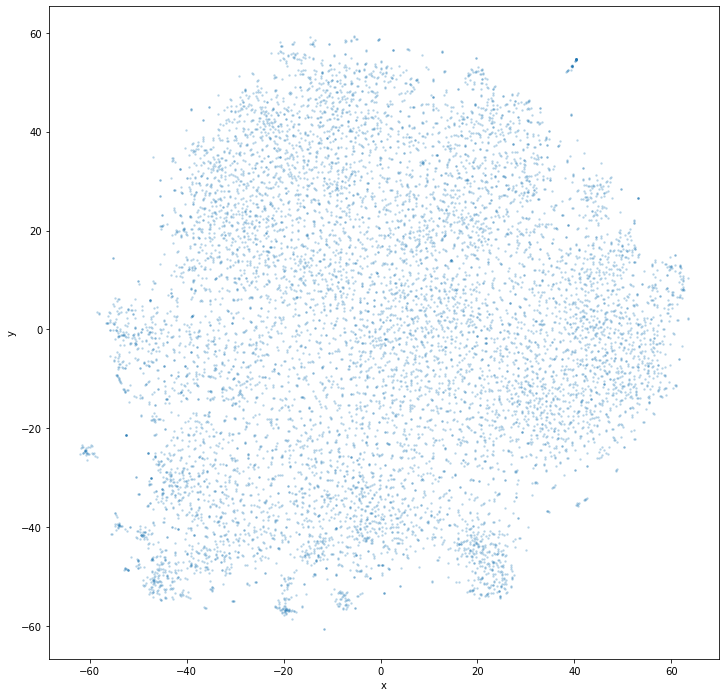

In [ ]:
_ = coords_df.plot.scatter('x', 'y', figsize=(12,12), 
                  marker='.', s=10, alpha=0.2)

In [ ]:
output_notebook()

In [ ]:
subset_df = coords_df.sample(n=5000)

In [ ]:
p = figure(plot_width=800, plot_height=800)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)

In [ ]:
show(p)